In [12]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [13]:
date_range = pd.date_range(end=pd.Timestamp.today() - pd.Timedelta(days=30), 
                           start=pd.Timestamp.today() - pd.Timedelta(days=60), 
                           freq='D')

In [14]:
tk = 'GC=F'
# Download S&P 500 historical data
df = yf.download(tk, start=date_range[0], progress=False)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=336720, Mon May 26 09:51:33 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 2.186399258797591e-03 1.0e+00 9.84e-01  9e-02  5e+04 0:00.0
    2    320 2.221568227183023e-03 1.8e+00 9.45e-01  7e-02  2e+04 0:00.0
    3    480 2.167973244256362e-03 3.6e+00 1.02e+00  7e-02  9e+03 0:00.0
   36   5760 1.945033555263294e-03 1.1e+02 2.24e+00  2e-06  2e-02 0:00.4
2025-05-25 00:00:00
3321.7875987323528


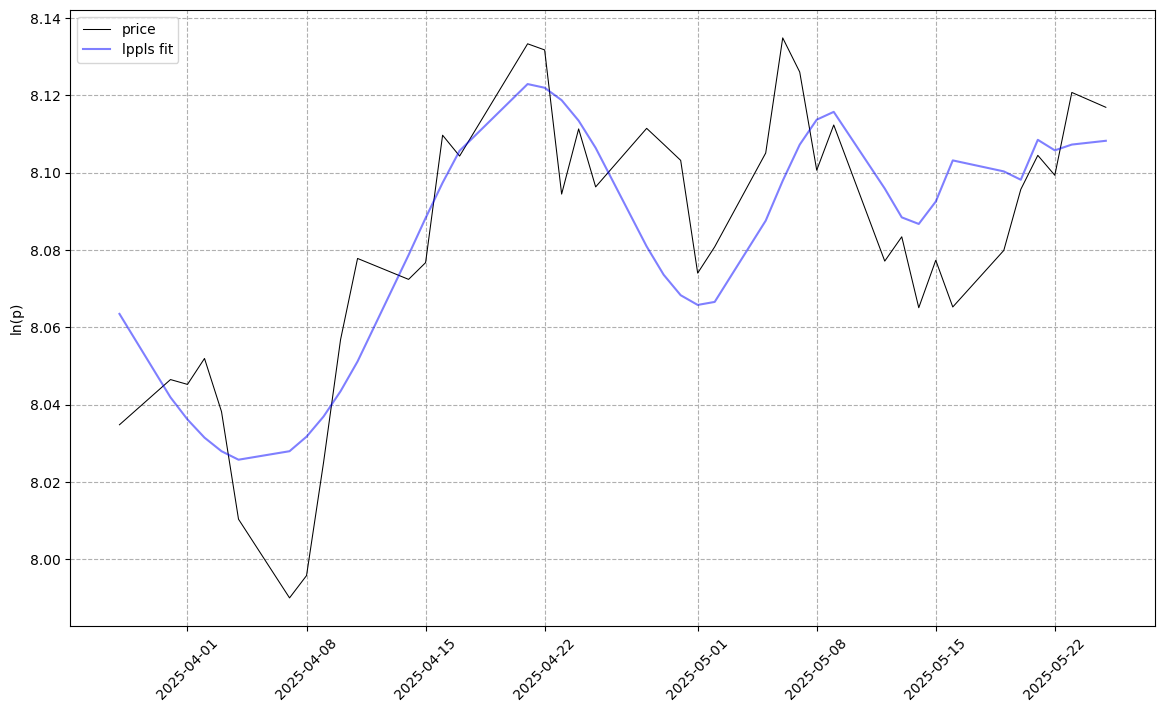

In [15]:
stop = False
for day in date_range:
    data = df.loc[day:]
    # convert time to ordinal
    time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

    # create list of observation data
    price = np.log(data['Close'].values).reshape(-1)

    # create observations array (expected format for LPPLS observations)
    observations = np.array([time, price])

    try:
        lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        stop = True
    except:
        pass

    if stop:
        break

# visualize the fit
lppls_model.plot_fit()
print(pd.Timestamp.fromordinal(int(tc)))
print(np.exp(a))